In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Utility Functions

In [9]:
def format_time_df(df, start_time=None):
    time_column = list(df['unix_time'])
    if start_time is None:
        start_time = time_column[0]
    time_column = [(t - start_time) / 3600.0 for t in time_column]

    df.insert(0, 'monitor_time_hrs', time_column)
    return df

In [3]:
# Actuators of interest for each sensor
sensors_to_actuators = {
    'light': ['led'],
    'temp': ['led', 'fan'],
    'humid': ['fan', 'wpump'],
    'weight': ['wpump'],
    'smoist': ['fan', 'wpump'],
    'level': ['wpump']
}

In [4]:
# Axis labels for sensors
sensors_to_labels = {
    'light': 'Light Level',
    'temp': 'Temperature (degrees Celsius)',
    'humid': 'Humidity (%)',
    'weight': 'Greenhouse Weight (g)',
    'smoist': 'Soil Moisture',
    'level': 'Reservoir Level (mL)'
}

In [5]:
# Plot colors for actuators
actuators_to_colors = {
    'led': 'red',
    'fan': 'green',
    'wpump': 'blue'
}

In [6]:
# Get times when actuators were activated/deactivated
def get_actuator_activations(
    times: list[float],
    values: list) -> tuple[list[float], list[float]]:
    on = []
    off = []
    prev = None
    curr = None
    for (t, v) in zip(times, values):
        curr = v
        if prev is None:
            if curr:
                on.append(t)
            else:
                off.append(t)
        else:
            if isinstance(curr, bool):
                if prev != curr:
                    if curr:
                        on.append(t)
                    else:
                        off.append(t)
            elif isinstance(curr, int) or isinstance(curr, float):
                if (prev == 0 and curr != 0) or (prev != 0 and curr == 0):
                    if curr:
                        on.append(t)
                    else:
                        off.append(t)
        prev = curr
    return on, off

## Visualizing Simulated Data

In [12]:
sim_log_file_name = "./logs/day_0.csv"
sim_df = pd.read_csv(sim_log_file_name)
sim_df

,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,light_raw_2,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,946686000.0,0.0,22.0,72.0,774.847015,549.0,135.000000,135.000000,0,0,...,72,72,348.681152,426.165863,549,549,False,False,0,NaN
1,946686075.0,0.0,22.0,73.0,774.840027,549.0,135.000000,135.000000,0,0,...,73,73,348.678009,426.162018,549,549,False,False,0,NaN
2,946686150.0,0.0,22.0,74.0,774.833344,549.0,135.000000,135.000000,0,0,...,74,74,348.675018,426.158325,549,549,False,False,0,NaN
3,946686225.0,0.0,22.0,75.0,774.826935,549.0,135.000000,135.000000,0,0,...,75,75,348.672119,426.154816,549,549,False,False,0,NaN
4,946686300.0,0.0,22.0,76.0,774.820831,549.0,135.000000,135.000000,0,0,...,76,76,348.669373,426.151459,549,549,False,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,946772065.0,0.0,24.0,85.0,838.015747,672.0,131.850006,131.850006,0,0,...,85,85,377.107086,460.908661,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...
1434,946772140.0,0.0,24.0,85.0,838.010651,672.0,131.850006,131.850006,0,0,...,85,85,377.104797,460.905853,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...
1435,946772215.0,0.0,24.0,86.0,838.005768,672.0,131.850006,131.850006,0,0,...,86,86,377.102600,460.903168,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...
1436,946772290.0,0.0,24.0,87.0,838.001099,672.0,131.850006,131.850006,0,0,...,87,87,377.100494,460.900604,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...


In [13]:
start_time = list(sim_df['unix_time'])[0]

In [14]:
sim_df = format_time_df(sim_df)
sim_df

,monitor_time_hrs,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,0.000000,946686000.0,0.0,22.0,72.0,774.847015,549.0,135.000000,135.000000,0,...,72,72,348.681152,426.165863,549,549,False,False,0,NaN
1,0.020833,946686075.0,0.0,22.0,73.0,774.840027,549.0,135.000000,135.000000,0,...,73,73,348.678009,426.162018,549,549,False,False,0,NaN
2,0.041667,946686150.0,0.0,22.0,74.0,774.833344,549.0,135.000000,135.000000,0,...,74,74,348.675018,426.158325,549,549,False,False,0,NaN
3,0.062500,946686225.0,0.0,22.0,75.0,774.826935,549.0,135.000000,135.000000,0,...,75,75,348.672119,426.154816,549,549,False,False,0,NaN
4,0.083333,946686300.0,0.0,22.0,76.0,774.820831,549.0,135.000000,135.000000,0,...,76,76,348.669373,426.151459,549,549,False,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,23.906944,946772065.0,0.0,24.0,85.0,838.015747,672.0,131.850006,131.850006,0,...,85,85,377.107086,460.908661,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...
1434,23.927778,946772140.0,0.0,24.0,85.0,838.010651,672.0,131.850006,131.850006,0,...,85,85,377.104797,460.905853,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...
1435,23.948611,946772215.0,0.0,24.0,86.0,838.005768,672.0,131.850006,131.850006,0,...,86,86,377.102600,460.903168,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...
1436,23.969444,946772290.0,0.0,24.0,87.0,838.001099,672.0,131.850006,131.850006,0,...,87,87,377.100494,460.900604,672,672,False,False,0,/home/robotanist/User/images/image_946716540.0...


In [15]:
def plot_sim_sensor(df, sensor: str, actuators=None):
    X = df['monitor_time_hrs']
    Y = df[sensor]
    if actuators is None:
        actuators = sensors_to_actuators[sensor]  # Default

    plt.plot(X, Y, 'k', linewidth=1)

    for actuator in actuators:
        on_times, off_times = get_actuator_activations(X, df[actuator])
        color = actuators_to_colors[actuator]
        first = True
        for t in on_times:
            if first:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5,
                        label=f'{actuator} turned on')
            else:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5)
            first = False
        first = True
        for t in off_times:
            if first:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5,
                        label=f'{actuator} turned off')
            else:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5)
            first = False

    plt.xlabel('Hours Passed')
    plt.ylabel(sensors_to_labels[sensor])
    plt.title(f'Plot of {sensor} over time (Real)')
    plt.legend()
    plt.show()



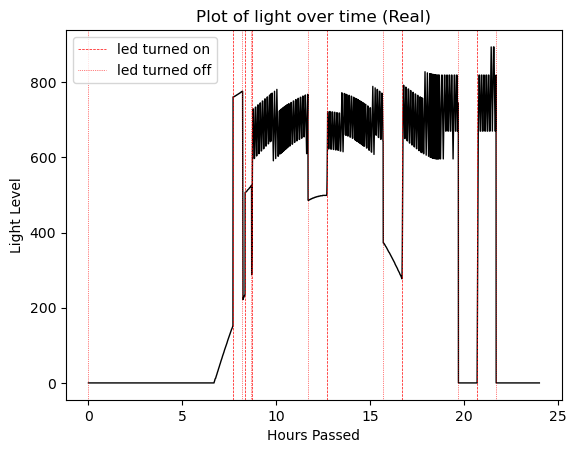

In [16]:
plot_sim_sensor(sim_df, 'light')

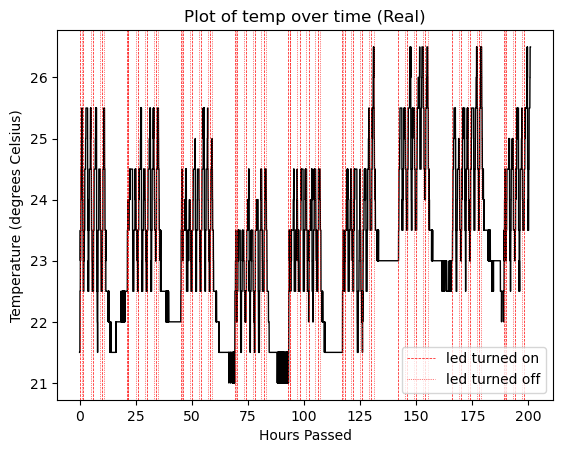

In [23]:
plot_sim_sensor(sim_df, 'temp', actuators=['led'])

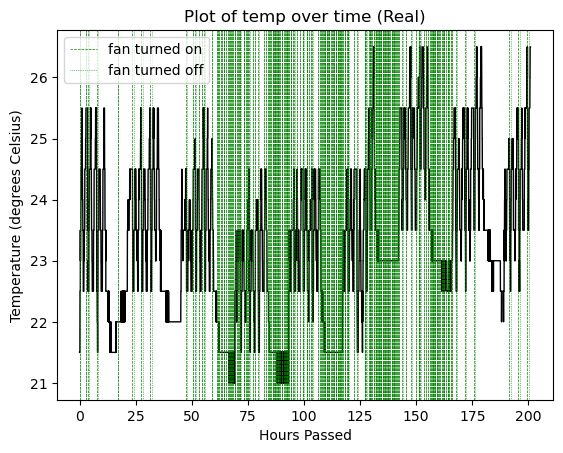

In [24]:
plot_sim_sensor(sim_df, 'temp', actuators=['fan'])

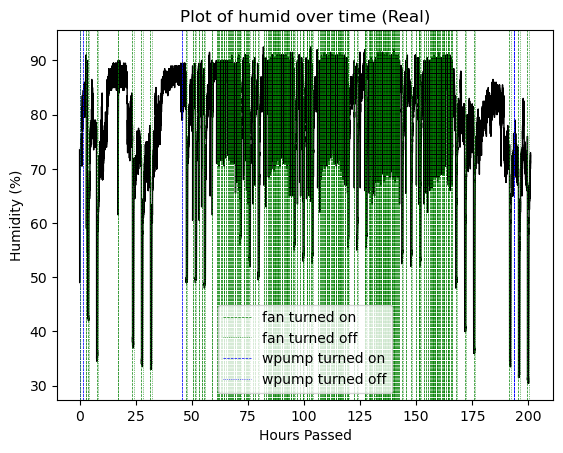

In [25]:
plot_sim_sensor(sim_df, 'humid')

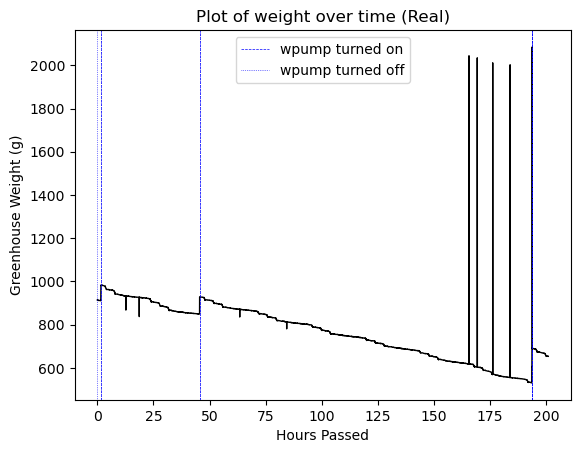

In [26]:
plot_sim_sensor(sim_df, 'weight')

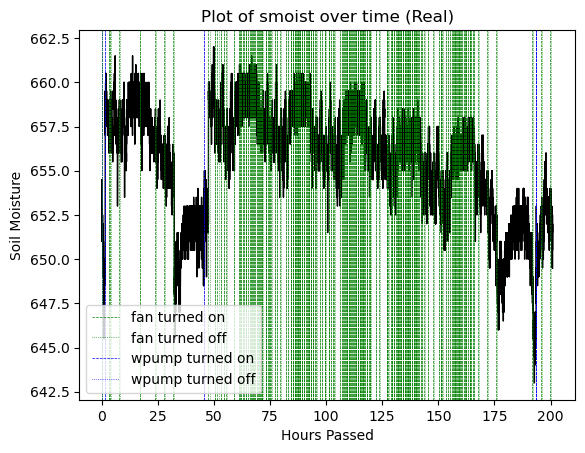

In [27]:
plot_sim_sensor(sim_df, 'smoist')

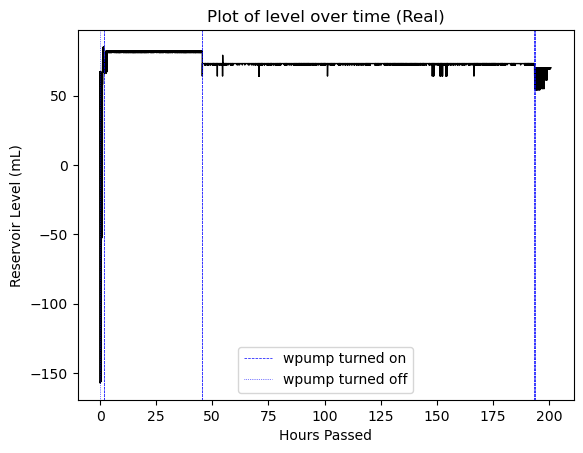

In [28]:
plot_sim_sensor(sim_df, 'level')

## Visualizing Real Data

### Functions to Format Data

In [7]:
def format_raw_line(line: str) -> str:
    line = line.strip()
    
    # Sensors
    line = line.replace("'Soil Moisture'", "smoist")
    line = line.replace("'Light Level'", "light")
    line = line.replace("'Humidity'", "humid")
    line = line.replace("'Water Level'", "level")
    line = line.replace("'Temperature'", "temp")
    line = line.replace("'Weight'", "weight")

    # Actuators
    line = line.replace("'LEDs'", "led")
    line = line.replace("'Fan'", "fan")
    line = line.replace("'Pump'", "wpump")

    # Format for CSV
    line_list = line.split(sep=' ')
    if len(line_list) == 4:
        line_list = line_list[:2] + [str(float(line_list[2]) + float(line_list[3]) / 2)]
    return ",".join(line_list) + ",\n"

In [8]:
# Formatting Function
def format_raw_data(raw_fname: str, formatted_fname: str):
    new_content = ["unix_time,feature,value,\n"]
    with open(raw_fname, "r") as file:
        for line in file:
            new_content += format_raw_line(line)
    
    with open(formatted_fname, "w") as file:
        for new_line in new_content:
            file.write(new_line)

In [9]:
# Take raw recorded data from remote server and format it into CSV file
raw_data_fname = "./grow_period_log/log.csv"
formatted_data_fname = "./grow_period_log/log_formatted.csv"
format_raw_data(raw_data_fname, formatted_data_fname)

### Plotting

In [11]:
real_log_file_name = "./grow_period_log/log.csv"
real_df = pd.read_csv(real_log_file_name, dtype={'unix_time': float, 'feature': str, 'value': float})
real_df

,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,light_raw_2,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,1.759331e+09,792.5,21.5,73.5,913.939972,653.0,67.0,67.0,863,722,...,85,62,498.579987,415.359985,638,668,True,False,180,NaN
1,1.759331e+09,892.0,21.5,56.5,913.829987,653.0,58.0,58.0,950,834,...,59,54,498.489990,415.339996,638,668,True,False,220,NaN
2,1.759331e+09,894.0,21.5,52.0,913.650024,653.0,67.0,67.0,949,839,...,52,52,498.510010,415.140015,638,668,True,False,220,NaN
3,1.759331e+09,895.5,21.5,51.5,913.609985,654.5,66.0,66.0,950,841,...,51,52,498.489990,415.119995,639,670,True,False,220,NaN
4,1.759331e+09,896.5,21.5,50.5,913.740021,653.0,67.0,67.0,950,843,...,50,51,498.510010,415.230011,637,669,True,False,220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67309,1.760054e+09,879.0,26.5,72.0,653.250000,651.5,70.0,70.0,920,838,...,78,66,347.420013,305.829987,631,672,False,False,200,/home/robotanist/User/images/image_1759668045....
67310,1.760054e+09,879.0,26.5,71.0,653.190002,651.5,70.0,70.0,920,838,...,78,64,347.350006,305.839996,631,672,False,False,200,/home/robotanist/User/images/image_1759668045....
67311,1.760054e+09,878.0,26.5,71.5,653.230011,652.0,70.0,70.0,919,837,...,78,65,347.410004,305.820007,632,672,False,False,200,/home/robotanist/User/images/image_1759668045....
67312,1.760054e+09,878.0,26.5,73.0,653.129974,651.5,70.0,70.0,919,837,...,78,68,347.359985,305.769989,632,671,False,False,200,/home/robotanist/User/images/image_1759668045....


In [12]:
real_df = format_time_df(real_df)
real_df

,monitor_time_hrs,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,0.000000,1.759331e+09,792.5,21.5,73.5,913.939972,653.0,67.0,67.0,863,...,85,62,498.579987,415.359985,638,668,True,False,180,NaN
1,0.002974,1.759331e+09,892.0,21.5,56.5,913.829987,653.0,58.0,58.0,950,...,59,54,498.489990,415.339996,638,668,True,False,220,NaN
2,0.005944,1.759331e+09,894.0,21.5,52.0,913.650024,653.0,67.0,67.0,949,...,52,52,498.510010,415.140015,638,668,True,False,220,NaN
3,0.008973,1.759331e+09,895.5,21.5,51.5,913.609985,654.5,66.0,66.0,950,...,51,52,498.489990,415.119995,639,670,True,False,220,NaN
4,0.011973,1.759331e+09,896.5,21.5,50.5,913.740021,653.0,67.0,67.0,950,...,50,51,498.510010,415.230011,637,669,True,False,220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67309,200.892083,1.760054e+09,879.0,26.5,72.0,653.250000,651.5,70.0,70.0,920,...,78,66,347.420013,305.829987,631,672,False,False,200,/home/robotanist/User/images/image_1759668045....
67310,200.895056,1.760054e+09,879.0,26.5,71.0,653.190002,651.5,70.0,70.0,920,...,78,64,347.350006,305.839996,631,672,False,False,200,/home/robotanist/User/images/image_1759668045....
67311,200.898056,1.760054e+09,878.0,26.5,71.5,653.230011,652.0,70.0,70.0,919,...,78,65,347.410004,305.820007,632,672,False,False,200,/home/robotanist/User/images/image_1759668045....
67312,200.901000,1.760054e+09,878.0,26.5,73.0,653.129974,651.5,70.0,70.0,919,...,78,68,347.359985,305.769989,632,671,False,False,200,/home/robotanist/User/images/image_1759668045....


In [13]:
def plot_real_sensor(df, sensor: str, actuators=None):
    X = df[df['feature'] == sensor]['monitor_time_hrs']
    Y = df[df['feature'] == sensor]['value']
    if actuators is None:
        actuators = sensors_to_actuators[sensor]  # Default

    plt.plot(X, Y, 'k-', linewidth=1, label=sensor)

    for actuator in actuators:
        T = df[df['feature'] == actuator]['monitor_time_hrs']
        Z = df[df['feature'] == actuator]['value']
        on_times, off_times = get_actuator_activations(T, Z)
        color = actuators_to_colors[actuator]
        first = True
        for t in on_times:
            if first:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5,
                        label=f'{actuator} turned on')
            else:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5)
            first = False
        first = True
        for t in off_times:
            if first:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5,
                        label=f'{actuator} turned off')
            else:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5)
            first = False

    plt.xlabel('Hours Passed')
    plt.ylabel(sensors_to_labels[sensor])
    plt.title(f'Plot of {sensor} over time (Real)')
    plt.legend()
    plt.show()


In [14]:
plot_real_sensor(real_df, 'light')

KeyError: 'feature'

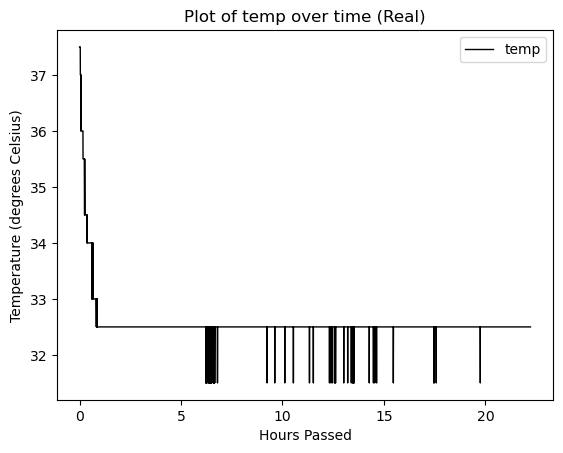

In [208]:
plot_real_sensor(real_df, 'temp', actuators=['led', 'fan'])

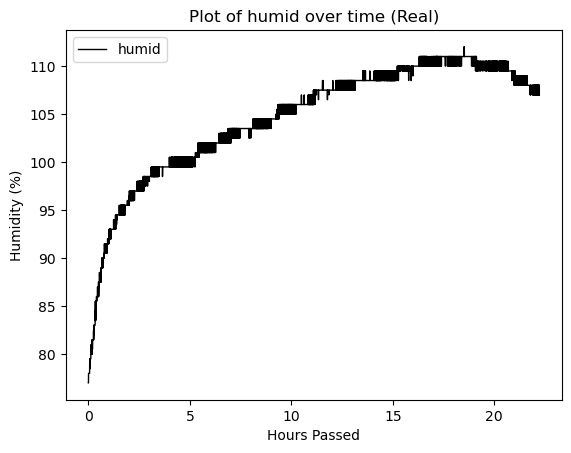

In [209]:
plot_real_sensor(real_df, 'humid')

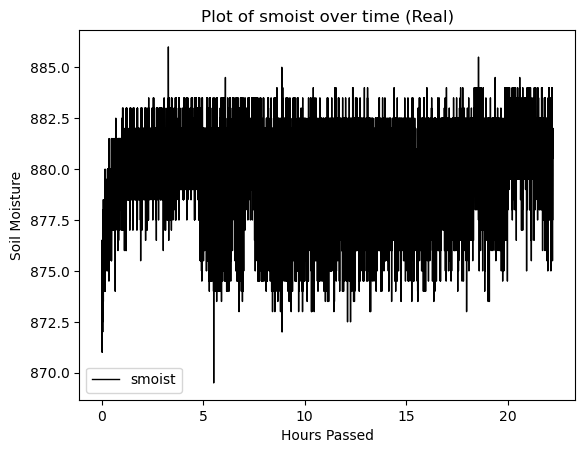

In [210]:
plot_real_sensor(real_df, 'smoist')

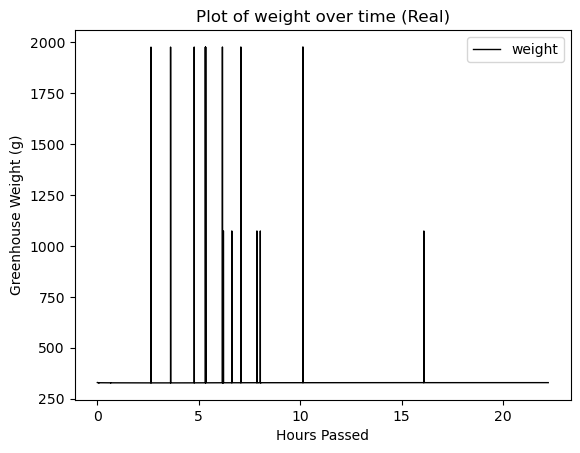

In [211]:
plot_real_sensor(real_df, 'weight')

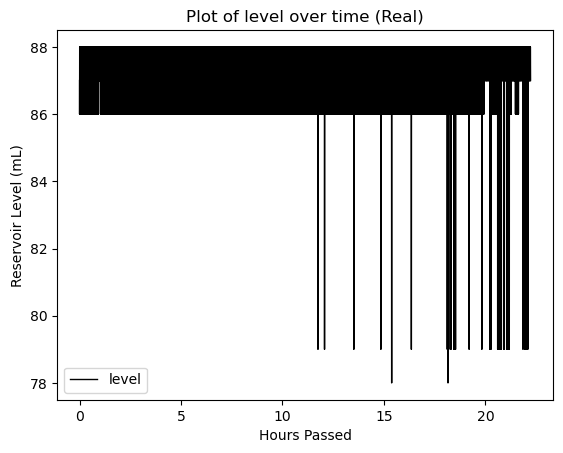

In [212]:
plot_real_sensor(real_df, 'level')